# Departamento de Engenharia de Teleinformática

# Inteligência Computacional Aplicada - HW1

# Profª. Drª Michela Mulas

# Aluno: Caio Cid Santiago Barbosa - 378596

## Questão 1 e 2

Nas primeiras duas questões, foi pedido que analisassemos os histogramas dos *predictors*, além de suas médias, desvio padrão e *skewness*, sendo na primeira englobando todas as amostras e na segunda dividindo-os por tipo. Começaremos, portanto, primeiro com o histograma por *predictors* de todas as amostras.

,Mean,Standard Deviation,Skewness
RI,1.51836542,0.003036864,1.6027151
Na,13.40785047,0.816603556,0.4478343
Mg,2.68453271,1.442407845,-1.1364523
Al,1.44490654,0.499269646,0.8946104
Si,72.65093458,0.774545795,-0.7202392
K,0.49705607,0.652191846,6.4600889
Ca,8.95696262,1.423153487,2.0184463
Ba,0.17504673,0.497219261,3.3686800
Fe,0.05700935,0.097438701,1.7298107


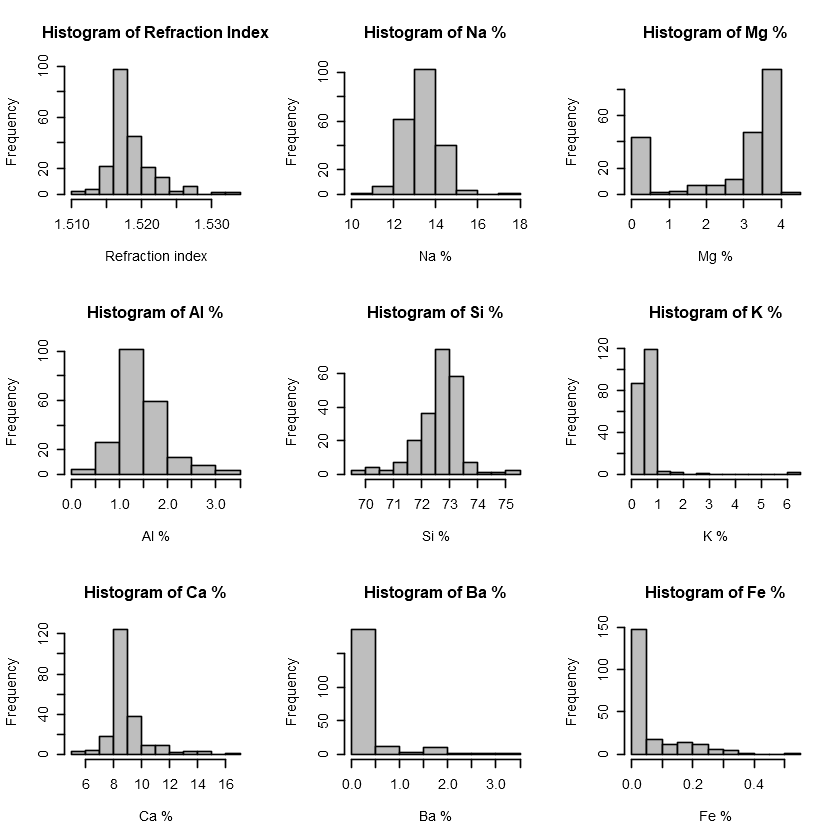

In [38]:
library(mlbench); 
library("AppliedPredictiveModeling");
library("e1071");
library(corrplot);
library(ggplot2);
library(ggfortify);
data(Glass);

#Questao 1

par(mfrow=c(3,3))

RI.hist <- hist(Glass$RI, main = "Histogram of Refraction Index", 
                xlab = "Refraction index", col = "Gray")

Na.hist <- hist(Glass$Na, main = "Histogram of Na %", 
                xlab = "Na %", col = "Gray")

Mg.hist <- hist(Glass$Mg, main = "Histogram of Mg %", 
                xlab = "Mg %",col = "Gray")

Al.hist <- hist(Glass$Al, main = "Histogram of Al %", 
                xlab = "Al %", col = "Gray")

Si.hist <- hist(Glass$Si, main = "Histogram of Si %", 
                xlab = "Si %",col = "Gray")

K.hist <- hist(Glass$K, main = "Histogram of K %", 
               xlab = "K %",col = "Gray")

Ca.hist <- hist(Glass$Ca, main = "Histogram of Ca %", 
                xlab = "Ca %",col = "Gray")

Ba.hist <- hist(Glass$Ba, main = "Histogram of Ba %", 
                xlab = "Ba %",col = "Gray")

Fe.hist <- hist(Glass$Fe, main = "Histogram of Fe %", 
                xlab = "Fe %", col = "Gray")

meanAll <- c(mean(Glass$RI), mean(Glass$Na), mean(Glass$Mg), mean(Glass$Al), mean(Glass$Si), mean(Glass$K), 
             mean(Glass$Ca), mean(Glass$Ba), mean(Glass$Fe))
devAll <- c(sd(Glass$RI), sd(Glass$Na), sd(Glass$Mg), sd(Glass$Al), sd(Glass$Si), sd(Glass$K),
            sd(Glass$Ca), sd(Glass$Ba), sd(Glass$Fe))
skewAll <- c(skewness(Glass$RI), skewness(Glass$Na), skewness(Glass$Mg), skewness(Glass$Al), skewness(Glass$Si), 
             skewness(Glass$K), skewness(Glass$Ca), skewness(Glass$Ba), skewness(Glass$Fe))
dataAll <- data.frame(meanAll, devAll, skewAll)
rownames(dataAll) <- c("RI","Na","Mg","Al","Si","K","Ca","Ba","Fe")
colnames(dataAll) <- c("Mean", "Standard Deviation", "Skewness")

dataAll


Agora, analisaremos os histogramas das amostras por Tipo, indo de 1 a 7 (ressaltamos que não existem amostras do tipo 4).

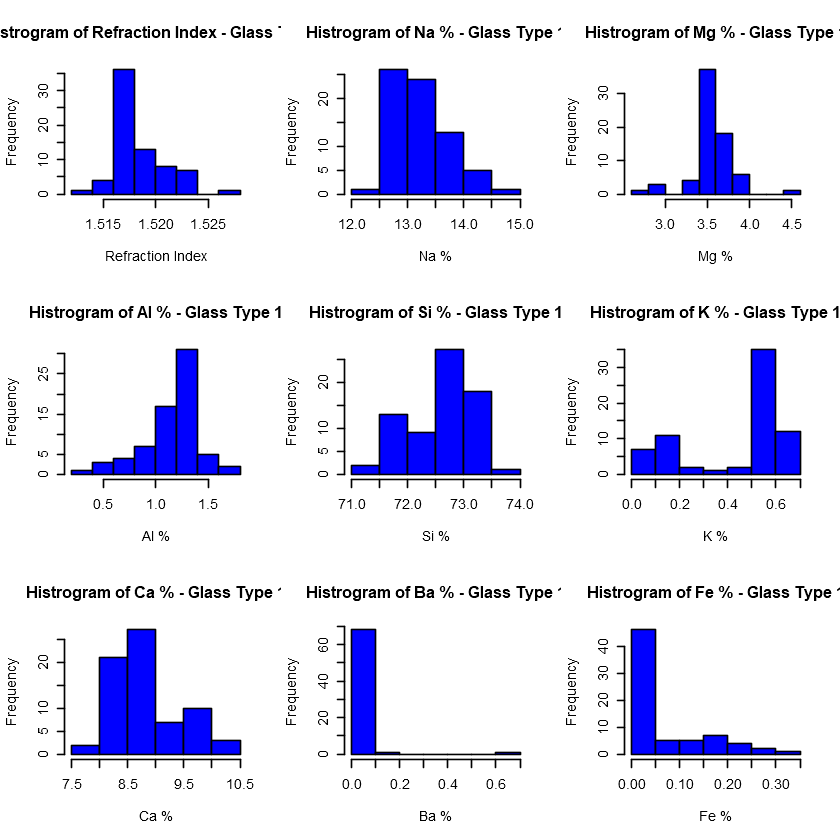

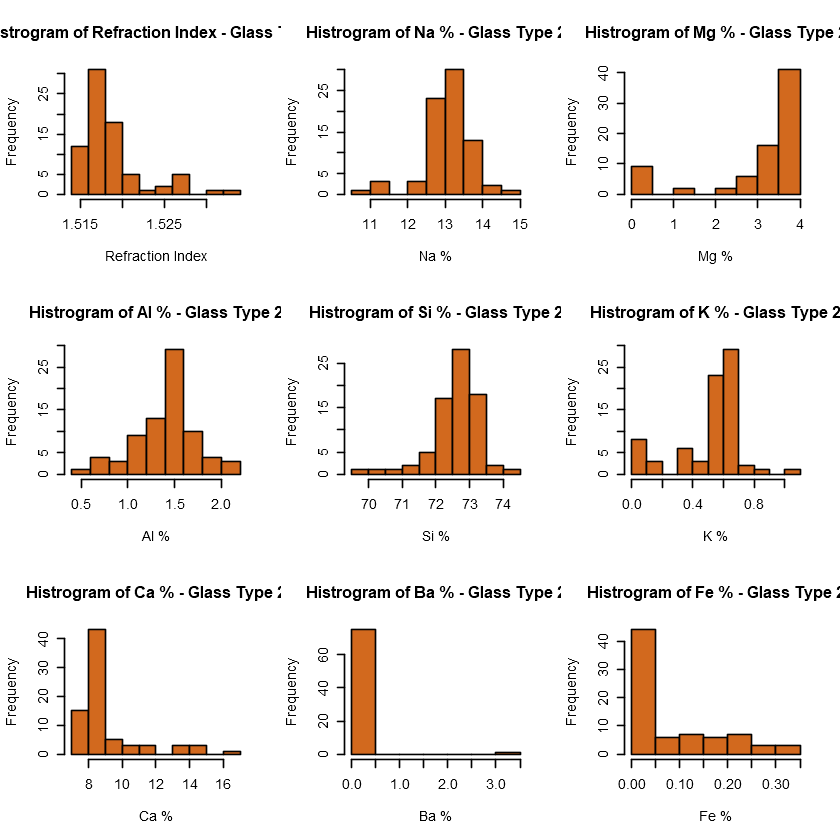

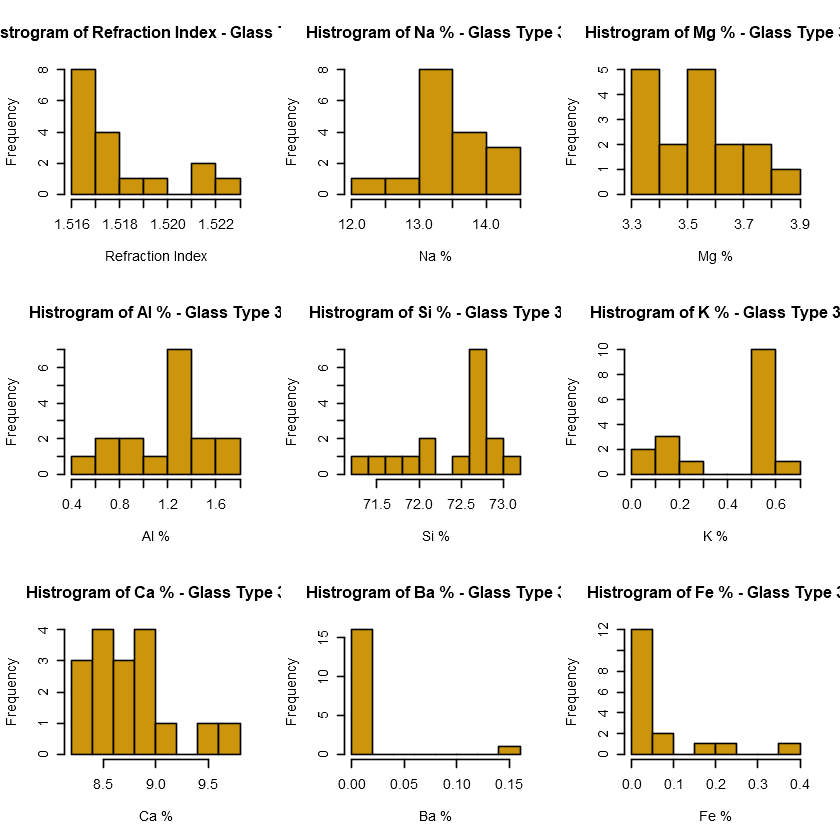

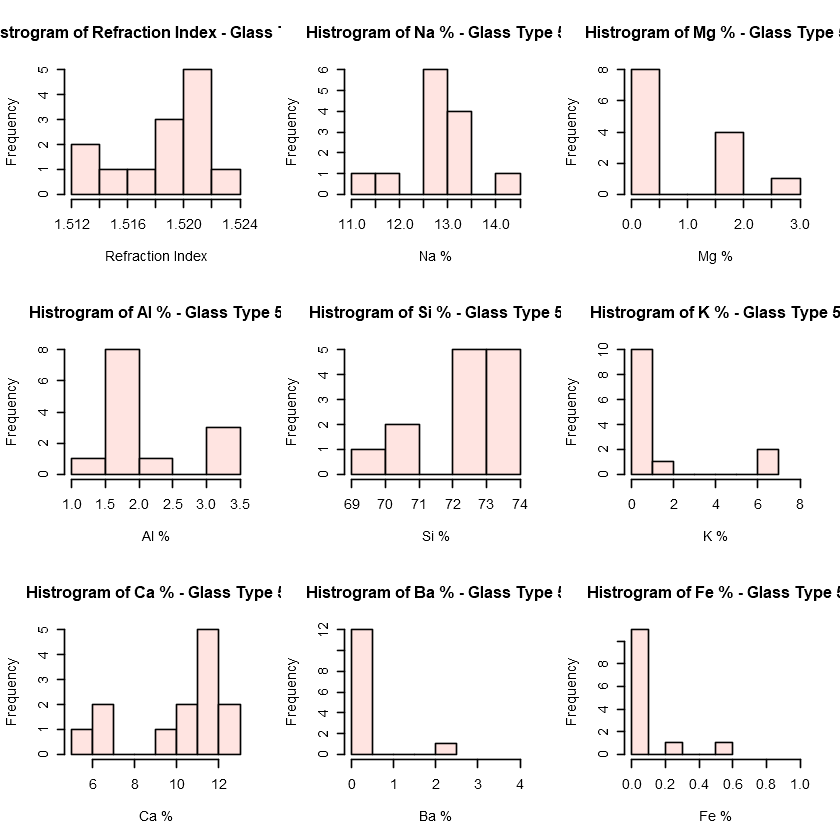

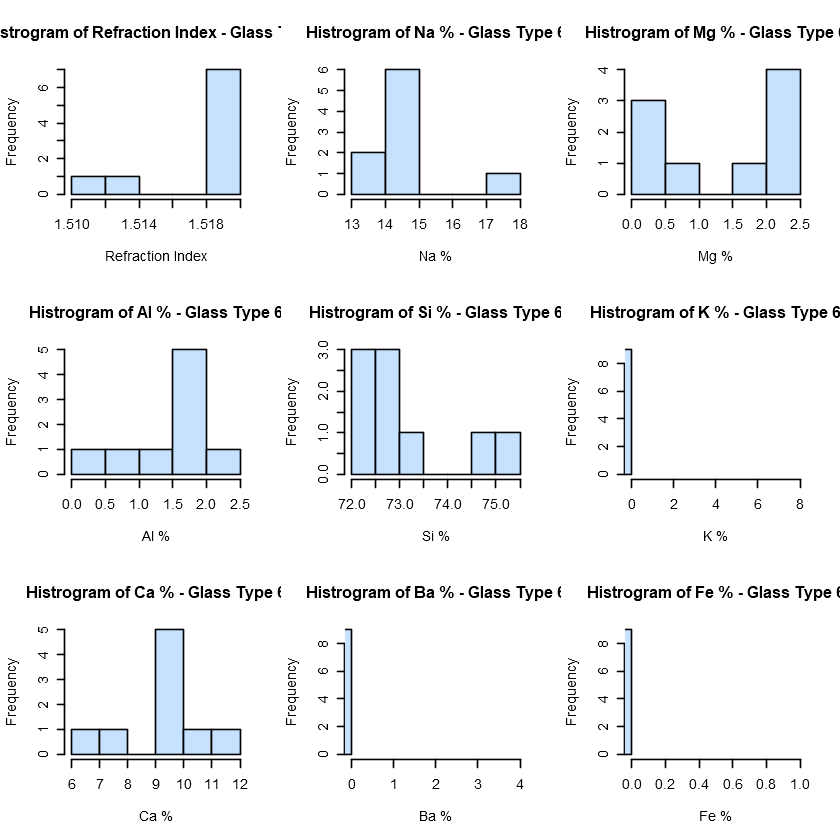

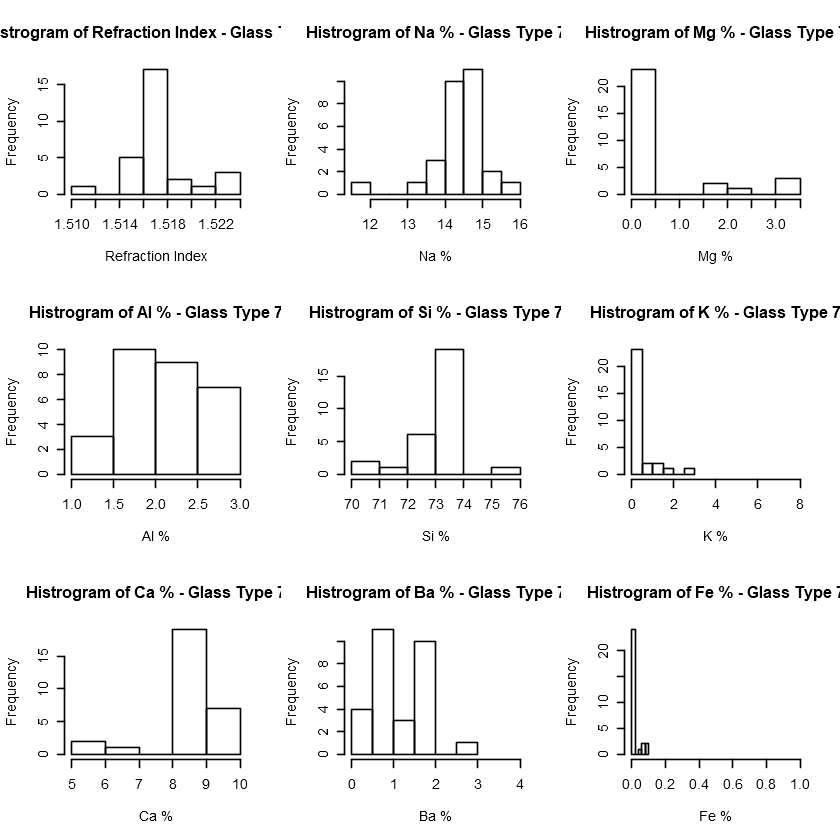

In [12]:
#Questao 2

par(mfrow=c(3,3))
GlassByType <- split(Glass, Glass$Type)
meanByType <- data.frame(RI = numeric(), Na = numeric(), Mg = numeric(), Al = numeric(), Si = numeric(),
                         K = numeric(), Ca = numeric(), Ba = numeric(), Fe = numeric())
devByType <- data.frame(RI = numeric(), Na = numeric(), Mg = numeric(), Al = numeric(), Si = numeric(),
                         K = numeric(), Ca = numeric(), Ba = numeric(), Fe = numeric())
skewByType <- data.frame(RI = numeric(), Na = numeric(), Mg = numeric(), Al = numeric(), Si = numeric(),
                         K = numeric(), Ca = numeric(), Ba = numeric(), Fe = numeric())

for (i in 1:3){
  
  hist(GlassByType[[i]]$RI, main = paste(c("Histrogram of Refraction Index - Glass Type",i), collapse = " "),
       xlab = "Refraction Index", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Na, main = paste(c("Histrogram of Na % - Glass Type",i), collapse = " "),
       xlab = "Na %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Mg, main = paste(c("Histrogram of Mg % - Glass Type",i), collapse = " "),
       xlab = "Mg %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Al, main = paste(c("Histrogram of Al % - Glass Type",i), collapse = " "),
       xlab = "Al %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Si, main = paste(c("Histrogram of Si % - Glass Type",i), collapse = " "),
       xlab = "Si %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$K, main = paste(c("Histrogram of K % - Glass Type",i), collapse = " "),
       xlab = "K %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Ca, main = paste(c("Histrogram of Ca % - Glass Type",i), collapse = " "),
       xlab = "Ca %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Ba, main = paste(c("Histrogram of Ba % - Glass Type",i), collapse = " "),
       xlab = "Ba %", col = colors()[26*i])
  
  hist(GlassByType[[i]]$Fe, main = paste(c("Histrogram of Fe % - Glass Type",i), collapse = " "),
       xlab = "Fe %", col = colors()[26*i])

meanByType <- rbind(meanByType, c(mean(GlassByType[[i]]$RI), mean(GlassByType[[i]]$Na), mean(GlassByType[[i]]$Mg), 
                                  mean(GlassByType[[i]]$Al), mean(GlassByType[[i]]$Si), mean(GlassByType[[i]]$K), 
                                  mean(GlassByType[[i]]$Ca), mean(GlassByType[[i]]$Ba), mean(GlassByType[[i]]$Fe)))
devByType <- rbind(devByType, c(sd(GlassByType[[i]]$RI), sd(GlassByType[[i]]$Na), sd(GlassByType[[i]]$Mg), 
                                  sd(GlassByType[[i]]$Al), sd(GlassByType[[i]]$Si), sd(GlassByType[[i]]$K), 
                                  sd(GlassByType[[i]]$Ca), sd(GlassByType[[i]]$Ba), sd(GlassByType[[i]]$Fe)))
skewByType <- rbind(skewByType, c(skewness(GlassByType[[i]]$RI), skewness(GlassByType[[i]]$Na), skewness(GlassByType[[i]]$Mg), 
                                  skewness(GlassByType[[i]]$Al), skewness(GlassByType[[i]]$Si), skewness(GlassByType[[i]]$K), 
                                  skewness(GlassByType[[i]]$Ca), skewness(GlassByType[[i]]$Ba), skewness(GlassByType[[i]]$Fe)))
  
}
for (i in 4:6){
  
  hist(GlassByType[[i]]$RI, main = paste(c("Histrogram of Refraction Index - Glass Type",i+1), collapse = " "),
       xlab = "Refraction Index", col = colors()[120*i])
  
  hist(GlassByType[[i]]$Na, main = paste(c("Histrogram of Na % - Glass Type",i+1), collapse = " "),
       xlab = "Na %", col = colors()[120*i])
  
  hist(GlassByType[[i]]$Mg, main = paste(c("Histrogram of Mg % - Glass Type",i+1), collapse = " "),
       xlab = "Mg %", col = colors()[120*i])
  
  hist(GlassByType[[i]]$Al, main = paste(c("Histrogram of Al % - Glass Type",i+1), collapse = " "),
       xlab = "Al %", col = colors()[120*i])
  
  hist(GlassByType[[i]]$Si, main = paste(c("Histrogram of Si % - Glass Type",i+1), collapse = " "),
       xlab = "Si %", col = colors()[120*i])
  
  hist(GlassByType[[i]]$K, main = paste(c("Histrogram of K % - Glass Type",i+1), collapse = " "),
       xlab = "K %", col = colors()[120*i], xlim = c(0,8))
  
  hist(GlassByType[[i]]$Ca, main = paste(c("Histrogram of Ca % - Glass Type",i+1), collapse = " "),
       xlab = "Ca %", col = colors()[120*i])
  
  hist(GlassByType[[i]]$Ba, main = paste(c("Histrogram of Ba % - Glass Type",i+1), collapse = " "),
       xlab = "Ba %", col = colors()[120*i], xlim = c(0,4))
  
  hist(GlassByType[[i]]$Fe, main = paste(c("Histrogram of Fe % - Glass Type",i+1), collapse = " "),
       xlab = "Fe %", col = colors()[120*i], xlim = c(0,1))
  
meanByType <- rbind(meanByType, c(mean(GlassByType[[i]]$RI), mean(GlassByType[[i]]$Na), mean(GlassByType[[i]]$Mg), 
                                  mean(GlassByType[[i]]$Al), mean(GlassByType[[i]]$Si), mean(GlassByType[[i]]$K), 
                                  mean(GlassByType[[i]]$Ca), mean(GlassByType[[i]]$Ba), mean(GlassByType[[i]]$Fe)))
devByType <- rbind(devByType, c(sd(GlassByType[[i]]$RI), sd(GlassByType[[i]]$Na), sd(GlassByType[[i]]$Mg), 
                                  sd(GlassByType[[i]]$Al), sd(GlassByType[[i]]$Si), sd(GlassByType[[i]]$K), 
                                  sd(GlassByType[[i]]$Ca), sd(GlassByType[[i]]$Ba), sd(GlassByType[[i]]$Fe)))
skewByType <- rbind(skewByType, c(skewness(GlassByType[[i]]$RI), skewness(GlassByType[[i]]$Na), skewness(GlassByType[[i]]$Mg), 
                                  skewness(GlassByType[[i]]$Al), skewness(GlassByType[[i]]$Si), skewness(GlassByType[[i]]$K), 
                                  skewness(GlassByType[[i]]$Ca), skewness(GlassByType[[i]]$Ba), skewness(GlassByType[[i]]$Fe)))

}
rownames(meanByType) <- c("Tipo 1", "Tipo 2", "Tipo 3", "Tipo 5","Tipo 6","Tipo 7")
rownames(devByType) <-  c("Tipo 1", "Tipo 2", "Tipo 3", "Tipo 5","Tipo 6","Tipo 7")
rownames(skewByType) <- c("Tipo 1", "Tipo 2", "Tipo 3", "Tipo 5","Tipo 6","Tipo 7")

colnames(meanByType) <- c("RI","Na","Mg","Al","Si","K","Ca","Ba","Fe")
colnames(devByType) <- c("RI","Na","Mg","Al","Si","K","Ca","Ba","Fe")
colnames(skewByType) <- c("RI","Na","Mg","Al","Si","K","Ca","Ba","Fe")


### Mean by type

In [6]:
meanByType

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Tipo 1,1.518718,13.24229,3.5524286,1.163857,72.61914,0.4474286,8.797286,0.012714286,0.05700000
Tipo 2,1.518619,13.11171,3.0021053,1.408158,72.59803,0.5210526,9.073684,0.050263158,0.07973684
Tipo 3,1.517964,13.43706,3.5435294,1.201176,72.40471,0.4064706,8.782941,0.008823529,0.05705882
Tipo 5,1.518928,12.82769,0.7738462,2.033846,72.36615,1.4700000,10.123846,0.187692308,0.06076923
Tipo 6,1.517456,14.64667,1.3055556,1.366667,73.20667,0.0000000,9.356667,0.000000000,0.00000000
Tipo 7,1.517116,14.44207,0.5382759,2.122759,72.96586,0.3251724,8.491379,1.040000000,0.01344828


### Standard Deviation by type

In [13]:
devByType

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Tipo 1,0.002268097,0.4993015,0.2470430,0.2731581,0.5694842,0.2148790,0.5748066,0.08383769,0.08907496
Tipo 2,0.003802126,0.6641594,1.2156615,0.3183403,0.7245726,0.2137262,1.9216353,0.36234044,0.10643275
Tipo 3,0.001916360,0.5068871,0.1627859,0.3474889,0.5122758,0.2298897,0.3801112,0.03638034,0.10786361
Tipo 5,0.003345355,0.7770366,0.9991458,0.6939205,1.2823191,2.1386951,2.1837908,0.60825096,0.15558821
Tipo 6,0.003115783,1.0840203,1.0971339,0.5718610,1.0794675,0.0000000,1.4499483,0.00000000,0.00000000
Tipo 7,0.002545069,0.6863588,1.1176828,0.4427261,0.9402337,0.6684931,0.9735052,0.66534094,0.02979404


### Skewness by type

In [14]:
skewByType

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Tipo 1,0.7437286,0.7538231,-0.6767263,-1.0800373,-0.5542691,-0.8997727,0.6863776,7.5619933,1.3041178
Tipo 2,2.0576334,-1.0495492,-1.7735903,-0.3715251,-1.3759015,-0.9699909,2.0816494,8.2385374,0.9489729
Tipo 3,0.9707950,-0.4619438,0.6021565,-0.3325460,-0.6913984,-0.6377215,0.7853627,3.4240324,1.6919393
Tipo 5,-0.5692461,-0.9348808,0.5860668,0.9982672,-0.6439219,1.5919612,-0.7898330,2.7606112,2.0163265
Tipo 6,-1.1310170,1.6786808,-0.2194845,-0.6702752,0.9974867,NaN,-0.5485900,NaN,NaN
Tipo 7,0.9765233,-1.4473029,1.6320747,-0.2928373,-1.2115324,2.1395094,-1.9355386,0.4505834,1.7805965


Analisando os histogramas, percebemos que não existe nenhum *predictor* com poder discriminativo. Ou seja, nenhum *predictor* sozinho consegue distinguir os tipos. Percebemos isso pois não há nenhuma relação distintiva dos histogramas. Nenhum deles aumentar linearmente, por exemplo.

## Questão 3

Nessa questão, foi pedido um *scatter plot* dos *predictors*, além de uma analise deles e da matriz de correlação. Começamos mostrando o *scatter plot*.

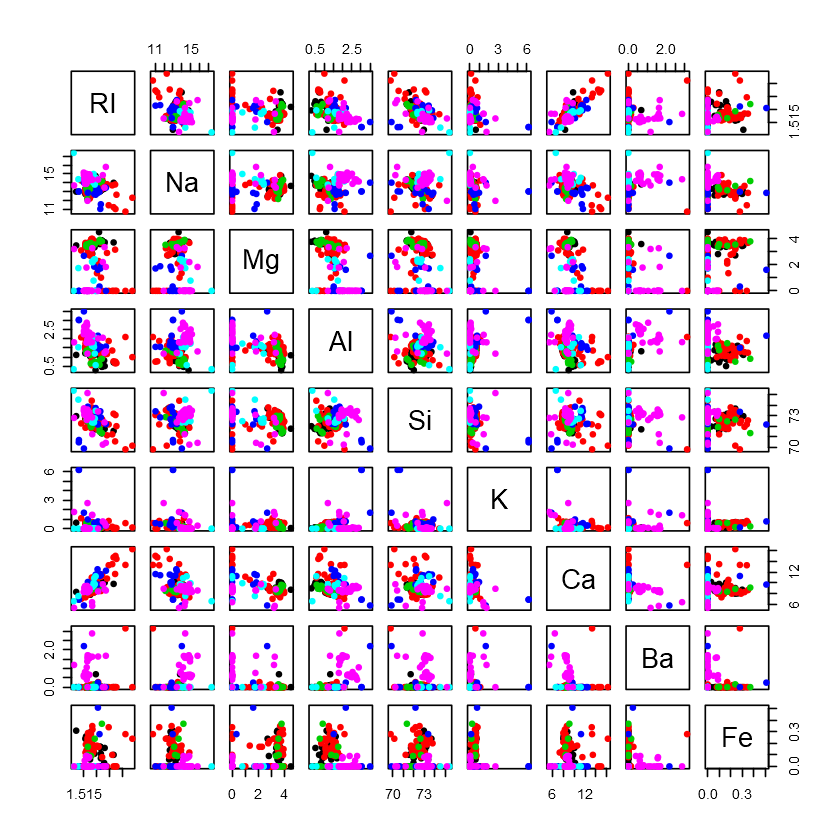

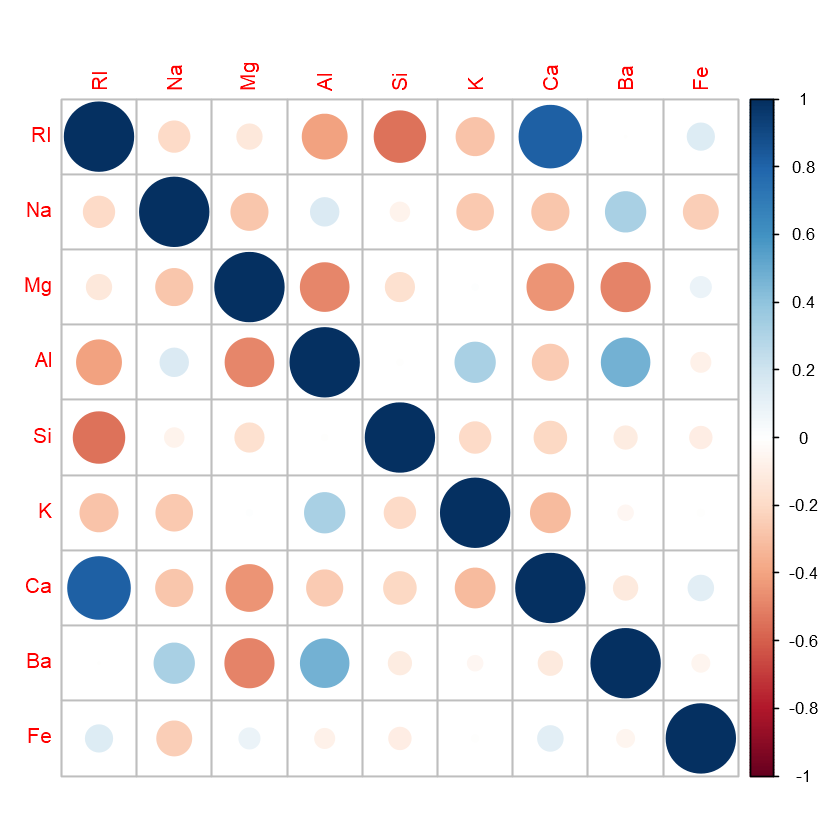

In [17]:
#Questao 3

pairs(Glass[1:9], col = Glass$Type, pch=20)

par(mfrow=c(1,1))
correlation <- cor(Glass[1:9])
corrplot(correlation)

Analisando o *scatter plot*, conseguimos identificar alguns graficos com aparentes relações lineares, como o do RI x Ca e o do RI x Si. Com a matriz de correlação, confirmamos nossas suspeitas ao visualisarmos que os dois elementos com maiores modulo são o do RI x Ca e do RI x Si. Isso indica que existe uma relação linear entre esses *predictors*, sendo a do RI x Ca proporcinal e a do RI x Si inversamente proporcional.

## Questao 4

Por último, foi pedido que façamos uma PCA dos *predictors*. Pelos dados passadas, analisando a matriz de correlação, podemos adiantar que os dois principais componentes provavelmente serão o do RI e do Ca. Dessa forma, os dados serão ortogonalizados nesses dois *predictors* Agora, iremos para o codigo. Primeiro, vamos verificar que a função **prcomp** fornece valores coerentes. Para isso, compararemos os valores de PCs fornecidos por ela, com os autovalores e autovetores fornecidos pela matriz de correlação.

In [26]:
#Questao 4

pcaObject <- prcomp(Glass[1:9], center = TRUE, scale. = TRUE)

pcaObject$rotation
eigen(correlation)$vectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
RI,-0.5451766,0.28568318,-0.0869108293,-0.14738099,0.073542700,-0.11528772,-0.08186724,-0.75221590,-0.02573194
Na,0.2581256,0.27035007,0.3849196197,-0.49124204,-0.153683304,0.55811757,-0.14858006,-0.12769315,0.31193718
Mg,-0.1108810,-0.59355826,-0.0084179590,-0.37878577,-0.123509124,-0.30818598,0.20604537,-0.07689061,0.57727335
Al,0.4287086,0.29521154,-0.3292371183,0.13750592,-0.014108879,0.01885731,0.69923557,-0.27444105,0.19222686
Si,0.2288364,-0.15509891,0.4587088382,0.65253771,-0.008500117,-0.08609797,-0.21606658,-0.37992298,0.29807321
K,0.2193440,-0.15397013,-0.6625741197,0.03853544,0.307039842,0.24363237,-0.50412141,-0.10981168,0.26050863
Ca,-0.4923061,0.34537980,0.0009847321,0.27644322,0.188187742,0.14866937,0.09913463,0.39870468,0.57932321
Ba,0.2503751,0.48470218,-0.0740547309,-0.13317545,-0.251334261,-0.65721884,-0.35178255,0.14493235,0.19822820
Fe,-0.1858415,-0.06203879,-0.2844505524,0.23049202,-0.873264047,0.24304431,-0.07372136,-0.01627141,0.01466944


0.5451766,-0.28568318,-0.0869108293,0.14738099,0.073542700,-0.11528772,0.08186724,0.75221590,0.02573194
-0.2581256,-0.27035007,0.3849196197,0.49124204,-0.153683304,0.55811757,0.14858006,0.12769315,-0.31193718
0.1108810,0.59355826,-0.0084179590,0.37878577,-0.123509124,-0.30818598,-0.20604537,0.07689061,-0.57727335
-0.4287086,-0.29521154,-0.3292371183,-0.13750592,-0.014108879,0.01885731,-0.69923557,0.27444105,-0.19222686
-0.2288364,0.15509891,0.4587088382,-0.65253771,-0.008500117,-0.08609797,0.21606658,0.37992298,-0.29807321
-0.2193440,0.15397013,-0.6625741197,-0.03853544,0.307039842,0.24363237,0.50412141,0.10981168,-0.26050863
0.4923061,-0.34537980,0.0009847321,-0.27644322,0.188187742,0.14866937,-0.09913463,-0.39870468,-0.57932321
-0.2503751,-0.48470218,-0.0740547309,0.13317545,-0.251334261,-0.65721884,0.35178255,-0.14493235,-0.19822820
0.1858415,0.06203879,-0.2844505524,-0.23049202,-0.873264047,0.24304431,0.07372136,0.01627141,-0.01466944


Com isso, verificamos que os autovetores estão iguais, comprovando a eficacia do **prcomp** e de seus parâmetros. Agora, iremos plotar os dados ortogonalizados em PC1 e PC2. Nos plots abaixos, utilizamos a biblioteca **ggfortify** e **ggplot2** para melhor visualização e distribuição dos dados. 

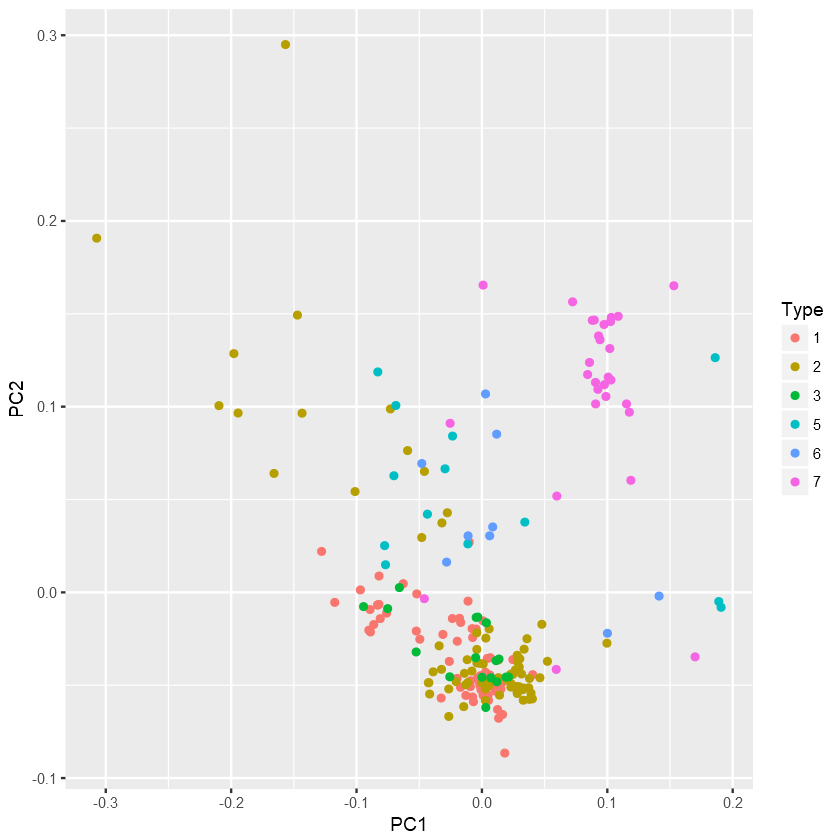

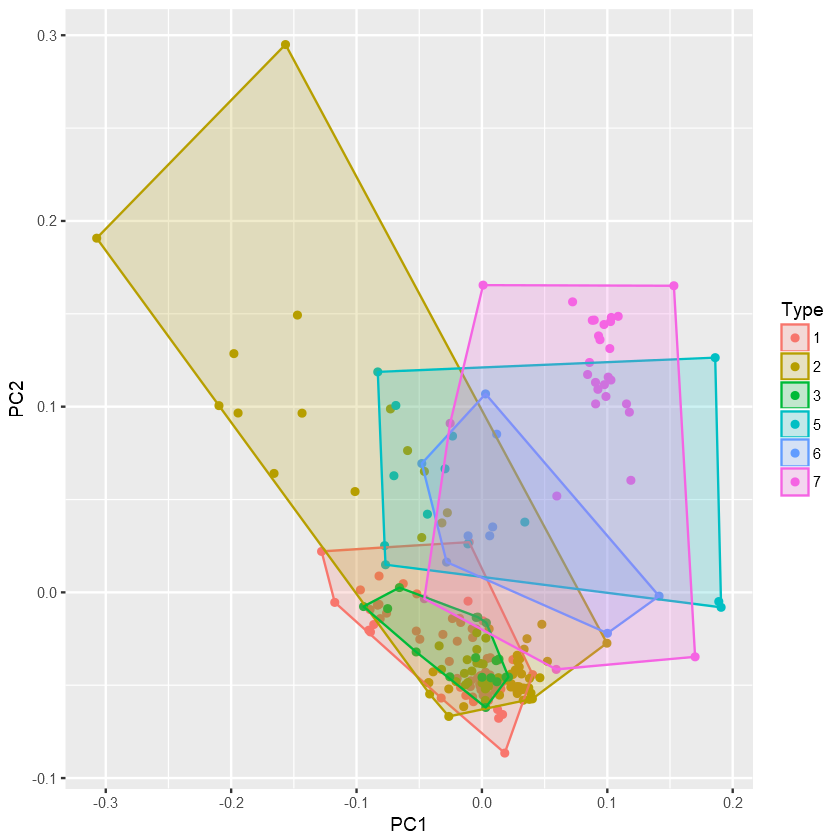

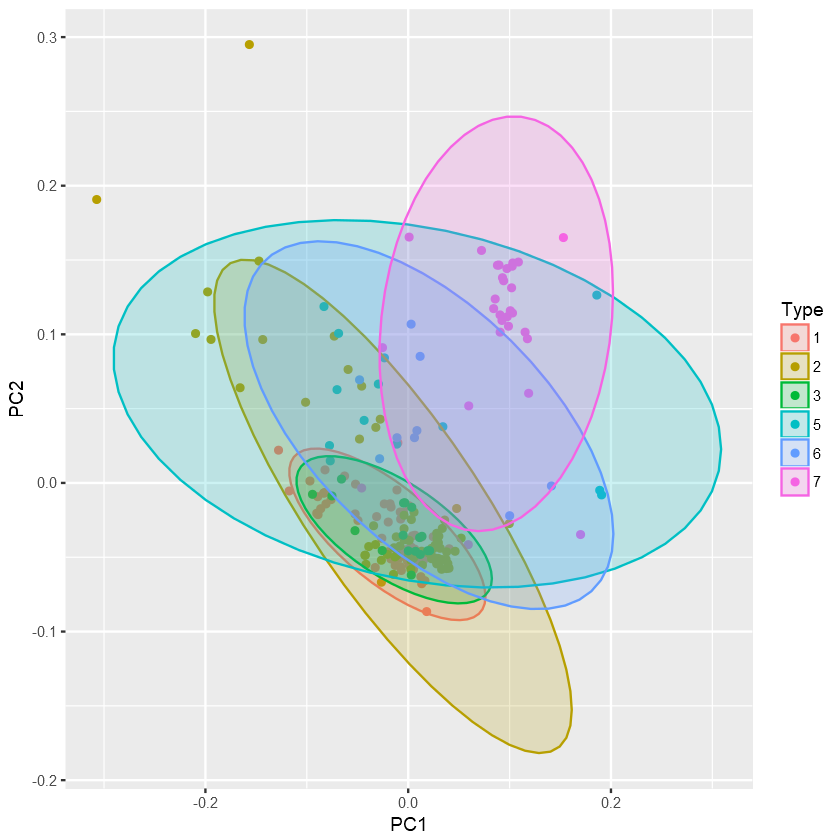

In [44]:
par(mfrow=c(1,1))
autoplot(pcaObject, data = Glass, colour = 'Type')
autoplot(pcaObject, data = Glass, colour = 'Type', frame = TRUE)
autoplot(pcaObject, data = Glass, colour = 'Type', frame = TRUE, frame.type = 'norm')

Observando o PCA, vemos que os dados do tipo 7 foram os que ficaram mais clusterizados(*clustered*), desse modo, ficando razoavelmente simples sua identificação. Contudo, ao agruparmos os dados por frames, para melhor visualização, vemos que ainda existe muita sobreposição por todos os tipos. No primeiro gráfico agrupado, vemos um sistema que considera os pontos mais longíquos e envolve todos os pontos desse tipo, o que não é uma aproximação desejada, tendo em vista que pega todos os *outliers*. É fácil perceber isso quando vemos o agrupamento do tipo 2, que envolve quase todos. O segunda agrupamento, por elipses, é mais coerente, pois desconsidera alguns *outliers*, porém, ainda também não é o ideal, pois tipos com poucos dados, como o tipo 2, acabam envolvendo uma área muito grande, enquanto não deveria ser tanto.

Percebemos pelos gráficos que as fronteiras das classes projetadas nos PCAs não são lineares, e que são de difícil separação apenas observando o gráfico. Além disso, identificamos também que os tipos 1,2,3 são os mais sobrepostos, sendo os de mais dificil separação.